## 序列到序列学习(seq2seq)

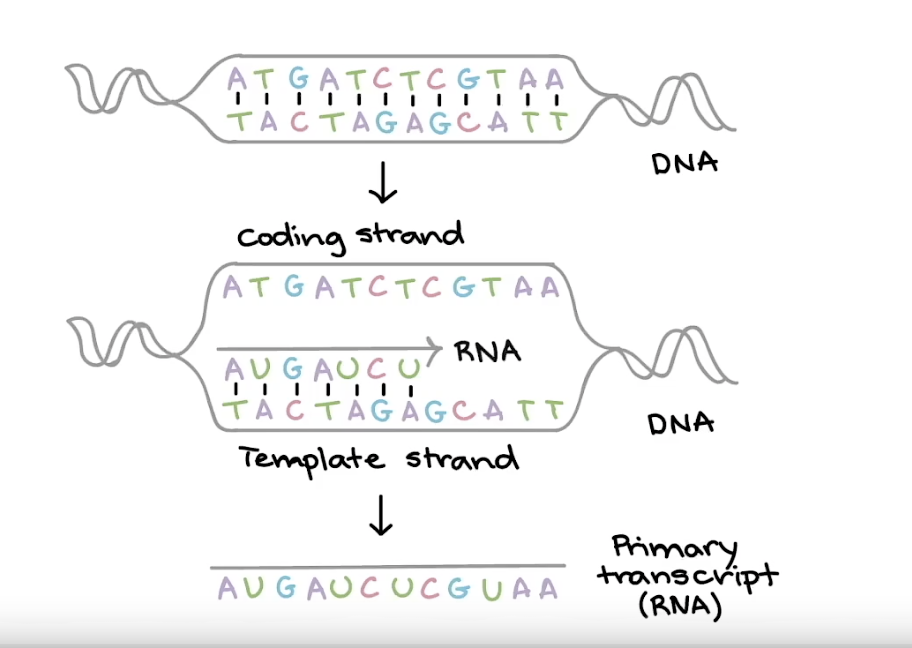

##  Seq2seq

- 编码器是一个RNN，读取输入句子
    - 可以是双向（双向可以做Encoder）
- 解码器是用另外一个RNN来输出

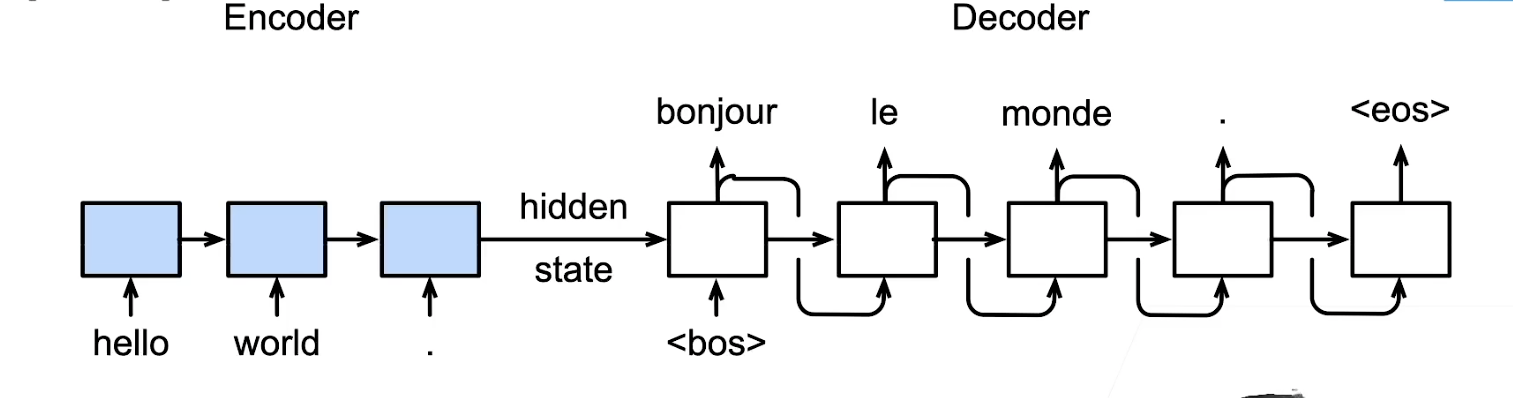

## 编码器-解码器细节

- 编码器是没有输出的RNN
- 编码器最后时间步的隐状态用作解码器的初始隐状态

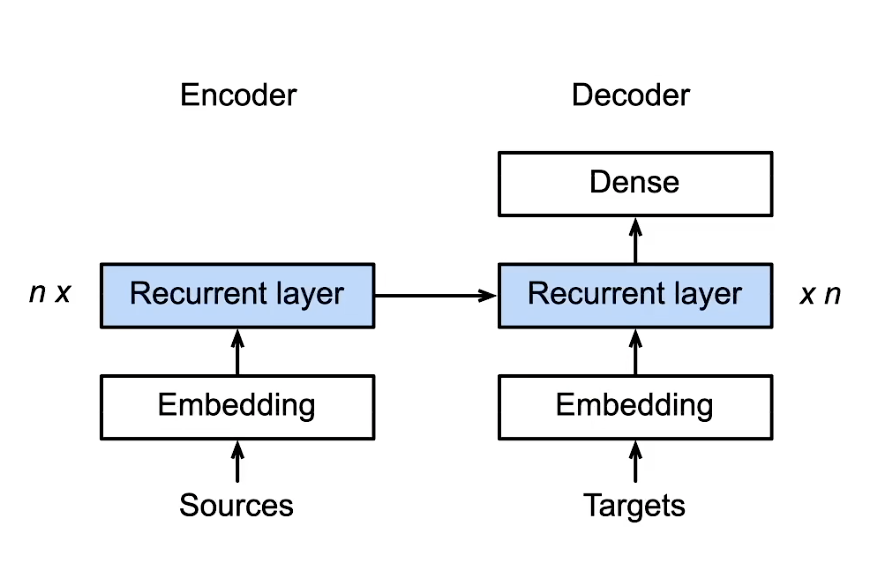

## 训练

- 训练时解码器是用目标句子作为输入

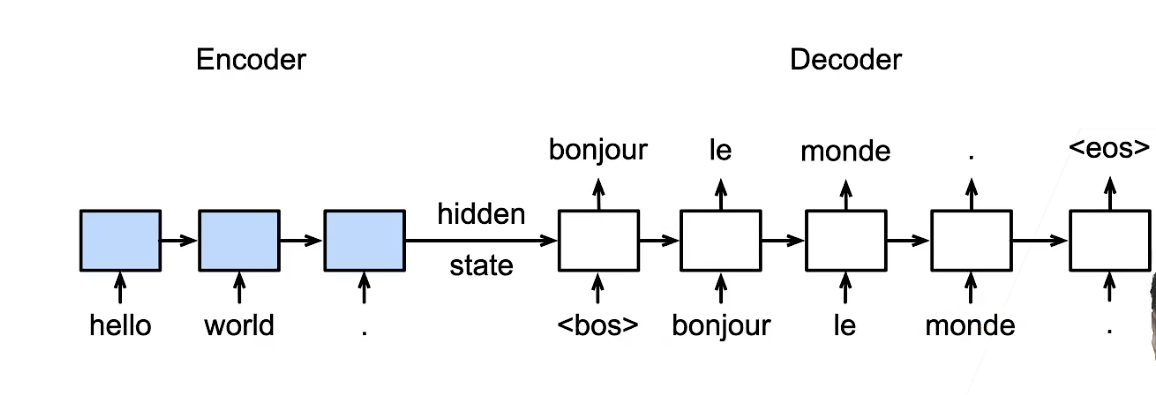

- 推理

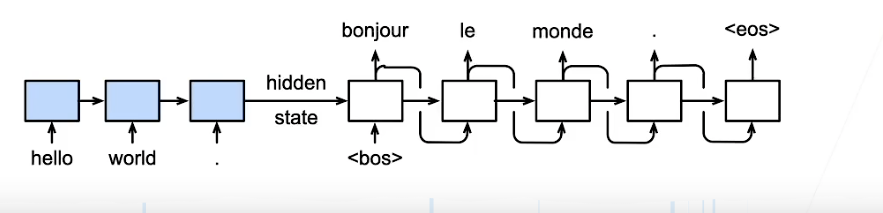

## 衡量生成序列的好坏的BLEU

- $p_n$ 是预测中所有n-gram的精度
    - 标签序列$A B C D E F$ 和预测序列$A B B C D$, 有
    $$
    p_1 = 4/5, p_2 = 3/4, p_3 = 1/3, p_4 = 0
    $$
- BLEU定义（越大越好，最高是1）

$$
\text{exp} \left( min \left(0, 1 - \frac{len_{label}}{len_{pred}} \right) \right) \prod_{n=1}^k p_n^{1/2^n}
$$

其中$\frac{len_{label}}{len_{pred}}$ 这项作用是惩罚过短的预测（因为预测的序列越短，更容易获得高n-gram精度），预测$len_{pred}$如果小于标签$len_{label}$, $1 - \frac{len_{label}}{len_{pred}}$ 为负数, exp(负数）是比较小的数字。

其中，$p_n^{1/2^n}$表示对于长的匹配，有更高的权重，n-gram的精度$p_n$是一个小于1的数字，如果$n$越大则 $1/2^n$越小，又因为$p_n < 1$，所以，$1/2^n$越小, $p_n$越大

## 总结
- Seq2seq从一个句子生成另一个句子
- 编码器和解码器都是RNN
- 将编码器最后时间隐状态来初始化解码器隐状态来完成信息传递
- 常用BLEU来衡量生成序列的好坏